# Paso 1: Instalación y carga de librerías

In [2]:
# !pip install scikit-learn matplotlib

## Importamos las principales librerías de procesamiento, modelado y visualización

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 2: Cargar y preparar los datos

Utilizaremos el dataset IMDB integrado en tensorflow.keras.datasets, pero reconstruiremos los textos para usarlos en scikit-learn.

In [4]:
from tensorflow.keras.datasets import imdb

In [5]:
# Cargar datos
(X_train_idx, y_train), (X_test_idx, y_test) = imdb.load_data(num_words=10000)

In [6]:
# Diccionario para decodificar palabras
word_index = imdb.get_word_index()
index_word = {i + 3: word for word, i in word_index.items()}
index_word[0], index_word[1], index_word[2], index_word[3] = "<PAD>", "<START>", "<UNK>", "<UNUSED>"

In [7]:
def decode_review(sequence):
    return ' '.join([index_word.get(i, '?') for i in sequence])

In [8]:
# Construir DataFrames con texto y etiquetas
df_train = pd.DataFrame({'review': [decode_review(x) for x in X_train_idx], 'label': y_train})
df_test = pd.DataFrame({'review': [decode_review(x) for x in X_test_idx], 'label': y_test})

In [11]:
# Unir y dividir aleatoriamente
df = pd.concat([df_train, df_test], ignore_index=True)
X = df['review']
y = df['label']
X_train_texts, X_test_texts, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X 

0        <START> this film was just brilliant casting l...
1        <START> big hair big boobs bad music and a gia...
2        <START> this has to be one of the worst films ...
3        <START> the <UNK> <UNK> at storytelling the tr...
4        <START> worst mistake of my life br br i picke...
                               ...                        
49995    <START> the book is better than the film mostl...
49996    <START> the largest crowd to ever see a wrestl...
49997    <START> i suppose that to say this is an all o...
49998    <START> in love 2 is the third movie it seemed...
49999    <START> a good ol' boy film is almost required...
Name: review, Length: 50000, dtype: object

# Paso 3: Vectorización de texto con TF-IDF

Transformamos las reseñas en vectores numéricos usando TfidfVectorizer, que
pondera cada palabra según su frecuencia relativa.

In [13]:
vectorizer = TfidfVectorizer(max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train_texts)
X_test_vec = vectorizer.transform(X_test_texts)

In [14]:
X_train_vec

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5061566 stored elements and shape (40000, 9772)>

# Paso 4: Entrenamiento de modelos clásicos

Entrenamos tres clasificadores: Naive Bayes, Regresión Logística y SVM Lineal.

In [15]:
# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred_nb = nb_model.predict(X_test_vec)

In [16]:
# Regresión Logística
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vec, y_train)
y_pred_lr = lr_model.predict(X_test_vec)

In [17]:
# SVM Lineal
svm_model = LinearSVC()
svm_model.fit(X_train_vec, y_train)
y_pred_svm = svm_model.predict(X_test_vec)

# Paso 5: Evaluación del desempeño

In [18]:
print("Naive Bayes:\n", classification_report(y_test, y_pred_nb))
print("Regresión Logística:\n", classification_report(y_test, y_pred_lr))
print("SVM:\n", classification_report(y_test, y_pred_svm))

Naive Bayes:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      4912
           1       0.87      0.85      0.86      5088

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Regresión Logística:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4912
           1       0.89      0.90      0.90      5088

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

SVM:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      4912
           1       0.89      0.89      0.89      5088

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.8

# Paso 6: Visualización con Matriz de Confusión

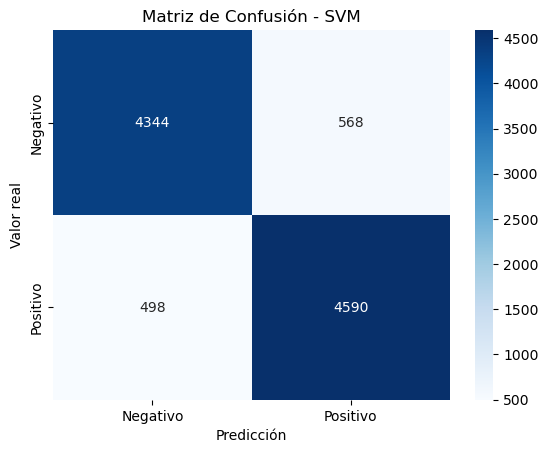

In [20]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=['Negativo', 'Positivo'],
yticklabels=['Negativo', 'Positivo'])
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()